In [1]:
sdf_dir_chiral = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_chiral"
sdf_dir_no_chiral = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_no_chiral"
sdf_dir_coconut = "/gs/fs/tga-ohuelab/sakano/git/Vina_T4_Queue/ligands/sdf_coconut"

In [4]:
import os
from rdkit import Chem
from rdkit.rdBase import DisableLog
from tqdm import tqdm

DisableLog("rdApp.info")
DisableLog("rdApp.warning")
DisableLog("rdApp.error")


def get_mols(sdf_dir):
    mols = []
    for filename in tqdm(os.listdir(sdf_dir), desc="Reading SDF files"):
        if filename.endswith(".sdf"):
            mol = Chem.SDMolSupplier(os.path.join(sdf_dir, filename))[0]
            mol.SetProp("_Name", filename)
            mols.append(mol)
    return mols


mols_chiral = get_mols(sdf_dir_chiral)
mols_no_chiral = get_mols(sdf_dir_no_chiral)
mols_coconut = get_mols(sdf_dir_coconut)

print(f"Chiral mols: {len(mols_chiral)}")
print(f"No chiral mols: {len(mols_no_chiral)}")
print(f"COCONUT mols: {len(mols_coconut)}")

Reading SDF files:   8%|▊         | 744/9857 [00:00<00:10, 876.00it/s]

Reading SDF files: 100%|██████████| 9928/9928 [00:09<00:00, 1040.08it/s]

Chiral mols: 9857
No chiral mols: 9867
COCONUT mols: 9928


In [5]:
from e3fp.pipeline import fprints_from_mol
from logging import getLogger

getLogger("e3fp").setLevel("ERROR")


def get_fprints_list(mols):
    fprints_list = []
    for mol in tqdm(mols, desc="Generating fprints"):
        try:
            fprints = fprints_from_mol(mol)
            fprints_list.append(fprints)
        except Exception as e:
            print(f"Error: {e}")
    return fprints_list


fprints_list_chiral = get_fprints_list(mols_chiral)
fprints_list_no_chiral = get_fprints_list(mols_no_chiral)
fprints_list_coconut = get_fprints_list(mols_coconut)

print(f"Chiral fprints: {len(fprints_list_chiral)}")
print(f"No chiral fprints: {len(fprints_list_no_chiral)}")
print(f"COCONUT fprints: {len(fprints_list_coconut)}")

Generating fprints:   0%|          | 0/9857 [00:00<?, ?it/s]2025-01-12 21:51:49,807|INFO|Generating fingerprints for chiral_3461.sdf.
2025-01-12 21:51:49,914|INFO|Generated 1 fingerprints for chiral_3461.sdf.
Generating fprints:   0%|          | 1/9857 [00:00<18:09,  9.05it/s]2025-01-12 21:51:49,916|INFO|Generating fingerprints for chiral_3146.sdf.
2025-01-12 21:51:50,104|INFO|Generated 1 fingerprints for chiral_3146.sdf.
Generating fprints:   0%|          | 2/9857 [00:00<25:48,  6.36it/s]2025-01-12 21:51:50,105|INFO|Generating fingerprints for chiral_6793.sdf.
2025-01-12 21:51:50,157|INFO|Generated 1 fingerprints for chiral_6793.sdf.
2025-01-12 21:51:50,158|INFO|Generating fingerprints for chiral_8220.sdf.
2025-01-12 21:51:50,277|INFO|Generated 1 fingerprints for chiral_8220.sdf.
Generating fprints:   0%|          | 4/9857 [00:00<18:29,  8.88it/s]2025-01-12 21:51:50,278|INFO|Generating fingerprints for chiral_1508.sdf.
2025-01-12 21:51:50,458|INFO|Generated 1 fingerprints for chiral_1

2025-01-12 21:51:55,222|INFO|Generated 1 fingerprints for chiral_4568.sdf.
2025-01-12 21:51:55,222|INFO|Generating fingerprints for chiral_3135.sdf.
2025-01-12 21:51:55,345|INFO|Generated 1 fingerprints for chiral_3135.sdf.
Generating fprints:   1%|          | 74/9857 [00:05<14:59, 10.88it/s]2025-01-12 21:51:55,346|INFO|Generating fingerprints for chiral_1214.sdf.
2025-01-12 21:51:55,414|INFO|Generated 1 fingerprints for chiral_1214.sdf.
2025-01-12 21:51:55,415|INFO|Generating fingerprints for chiral_1851.sdf.
2025-01-12 21:51:55,455|INFO|Generated 1 fingerprints for chiral_1851.sdf.
Generating fprints:   1%|          | 76/9857 [00:05<13:12, 12.35it/s]2025-01-12 21:51:55,455|INFO|Generating fingerprints for chiral_1812.sdf.
2025-01-12 21:51:55,488|INFO|Generated 1 fingerprints for chiral_1812.sdf.
2025-01-12 21:51:55,489|INFO|Generating fingerprints for chiral_2831.sdf.
2025-01-12 21:51:55,628|INFO|Generated 1 fingerprints for chiral_2831.sdf.
Generating fprints:   1%|          | 78/98

Chiral fprints: 9857
No chiral fprints: 9867
COCONUT fprints: 9928


In [6]:
import numpy as np

fprints_chiral = np.array(
    [fps[0].fold(bits=2048).to_vector(sparse=False) for fps in fprints_list_chiral]
)
fprints_no_chiral = np.array(
    [fps[0].fold(bits=2048).to_vector(sparse=False) for fps in fprints_list_no_chiral]
)
fprints_coconut = np.array(
    [fps[0].fold(bits=2048).to_vector(sparse=False) for fps in fprints_list_coconut]
)

# save
np.save("fprints_chiral.npy", fprints_chiral)
np.save("fprints_no_chiral.npy", fprints_no_chiral)
np.save("fprints_coconut.npy", fprints_coconut)

In [2]:
import numpy as np

fprints_chiral = np.load("fprints_chiral.npy")
fprints_no_chiral = np.load("fprints_no_chiral.npy")
fprints_coconut = np.load("fprints_coconut.npy")

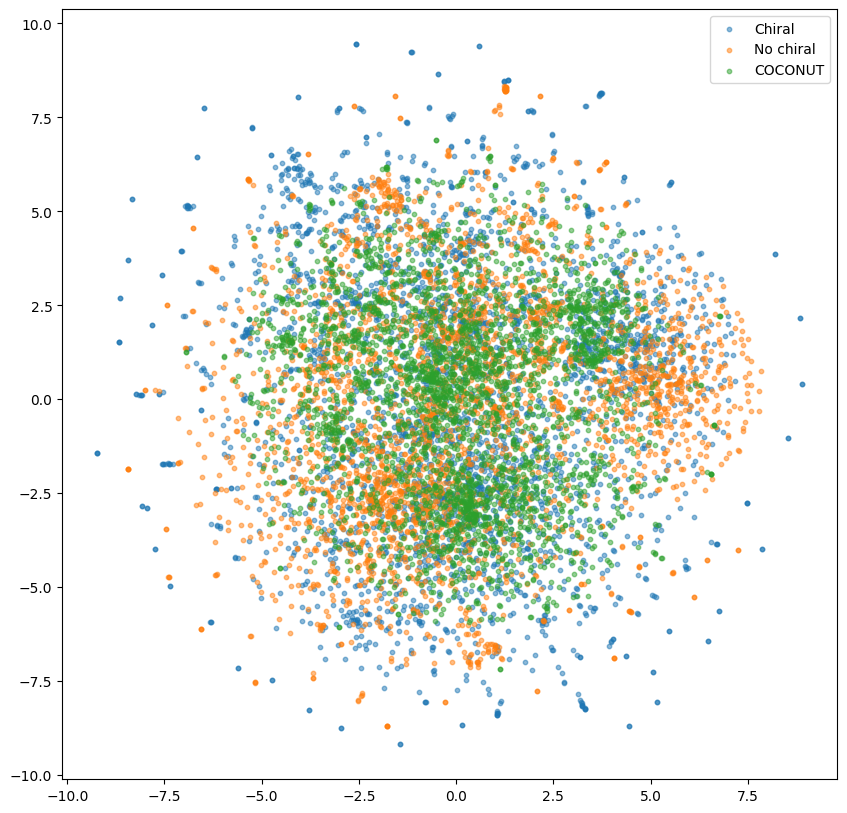

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fprints_chiral_reduced = np.random.permutation(fprints_chiral)[:3000]
fprints_no_chiral_reduced = np.random.permutation(fprints_no_chiral)[:3000]
fprints_coconut_reduced = np.random.permutation(fprints_coconut)[:3000]

tsne = TSNE(n_components=2, random_state=0)
fprints_chiral_tsne = tsne.fit_transform(fprints_chiral_reduced)
fprints_no_chiral_tsne = tsne.fit_transform(fprints_no_chiral_reduced)
fprints_coconut_tsne = tsne.fit_transform(fprints_coconut_reduced)

plt.figure(figsize=(10, 10))
plt.scatter(
    fprints_chiral_tsne[:, 0],
    fprints_chiral_tsne[:, 1],
    label="Chiral",
    alpha=0.5,
    s=10,
)
plt.scatter(
    fprints_no_chiral_tsne[:, 0],
    fprints_no_chiral_tsne[:, 1],
    label="No chiral",
    alpha=0.5,
    s=10,
)
plt.scatter(
    fprints_coconut_tsne[:, 0],
    fprints_coconut_tsne[:, 1],
    label="COCONUT",
    alpha=0.5,
    s=10,
)
plt.legend()
plt.show()

/home/5/uq02055/fs/git/np-generation/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/5/uq02055/fs/git/np-generation/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/5/uq02055/fs/git/np-generation/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/5/uq02055/fs/git/np-generation/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


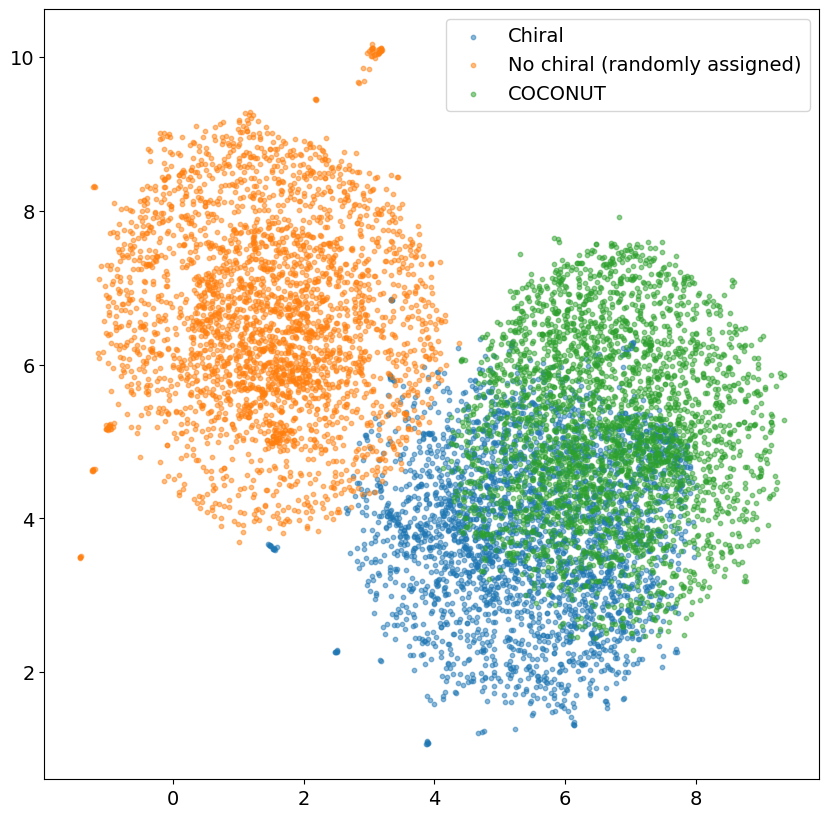

In [7]:
from umap import UMAP

umap = UMAP(n_components=2, random_state=0)

fprints_chiral_umap = umap.fit_transform(fprints_chiral_reduced)
fprints_no_chiral_umap = umap.fit_transform(fprints_no_chiral_reduced)
fprints_coconut_umap = umap.fit_transform(fprints_coconut_reduced)

plt.figure(figsize=(10, 10))
plt.scatter(
    fprints_chiral_umap[:, 0],
    fprints_chiral_umap[:, 1],
    label="Chiral",
    alpha=0.5,
    s=10,
)
plt.scatter(
    fprints_no_chiral_umap[:, 0],
    fprints_no_chiral_umap[:, 1],
    label="No chiral (randomly assigned)",
    alpha=0.5,
    s=10,
)
plt.scatter(
    fprints_coconut_umap[:, 0],
    fprints_coconut_umap[:, 1],
    label="COCONUT",
    alpha=0.5,
    s=10,
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()